In [44]:
import pandas as pd
from numpy import *
from sklearn.cluster import KMeans, Birch

# # for i in range(1, 11):
# frames = []
# for j in range(1, 1):
#     frames.append(pd.read_csv('data' + str(j) + '.csv'))
# for j in range(1 + 1, 11):
#     frames.append(pd.read_csv('data' + str(j) + '.csv'))
# len(frames)

9

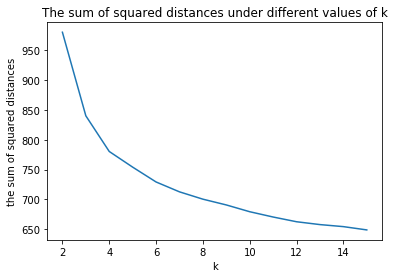

In [1]:
import pandas as pd
from numpy import *
from sklearn.cluster import KMeans, Birch
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
# from sklearn.metrics import calinski_harabasz_score

def clusterResultCount(data):
    classed = pd.concat([dna["Kingdom"], data["class"]], axis=1)
    compare = classed[['Kingdom','class']]
    class0 = compare[compare['class']==0]
    class1 = compare[compare['class']==1]
    class2 = compare[compare['class']==2]
    class3 = compare[compare['class']==3]
    class4 = compare[compare['class']==4]

    cluster = [class0,class1,class2,class3,class4]

    verify = []
    for c in cluster:
        vrl = len(c[c['Kingdom']=='vrl'])
        bct = len(c[c['Kingdom']=='bct'])
        pln = len(c[c['Kingdom']=='pln'])
        vrt = len(c[c['Kingdom']=='vrt'])
        inv = len(c[c['Kingdom']=='inv'])
        verify.append([vrl,bct,pln,vrt,inv])
    answer = pd.DataFrame(verify)
    answer.columns = ['vrl','bct','pln','vrt','inv']

    print(answer)

# dna = pd.read_csv('codon_usage.csv')
# dna['Kingdom'].value_counts()

# dna.drop(columns=['DNAtype','SpeciesID','Ncodons','SpeciesName'],inplace=True)

# rate = 1
# for i in range(1, 11):
#     print(0.1/rate)
#     data_split = dna.sample(frac=0.1/rate, replace=True, random_state=0, axis=0)
#     data_tmp = dna[~dna.index.isin(data_split.index)]
#     dna = data_tmp
#     data_split.to_csv("data" + str(i) + ".csv", index=False)
#     rate = 1 - 0.1 * i
# dna = shuffle(dna)
# for i in range(1, 11):
#     data = dna[1302*(i-1) : 1302*i - 1]
#     data.to_csv("data" + str(i) + ".csv", index=False)

# print(rate)

# data = dna.iloc[:,1:].astype(float)
# data1 = dna.iloc[:,1:].astype(float)

# def k_means(data):
#     k = KMeans(n_clusters = 5).fit_predict(data)

#     data.insert(data.shape[1], 'class', k)

#     clusterResultCount(data)

# def birch(data):
#     k = Birch(n_clusters = 6, threshold = 0.001).fit_predict(data)

#     data.insert(data.shape[1], 'class', k)

#     clusterResultCount(data)

def distance(vector1, vector2):
	return sqrt(sum(power(vector2 - vector1, 2)))

def crossValidation(k):
    dis = 0
    # ”i“ is the serial number of the test set file
    for i in range(1, 11):
      	
        # Read 9 training set data and merge them
        frames = []
        for j in range(1, i):
            frames.append(pd.read_csv('data' + str(j) + '.csv'))
        for j in range(i + 1, 11):
            frames.append(pd.read_csv('data' + str(j) + '.csv'))
        data = pd.concat(frames)
        data = data.iloc[:,1:].astype(float)

        # Use the training set data to train the model and get k center points
        km = KMeans(n_clusters = k)
        km.fit(data)
        centroids = km.cluster_centers_
        centroids = mat(centroids)

        # Read the test set file and preprocess it
        test_data = pd.read_csv('data' + str(i) + '.csv')
        test_data = test_data.iloc[:,1:].astype(float)
        test_data = mat(test_data.values)

        # Traverse each piece of data in the test set，
        # find the nearest center point,
        # and calculate the distance to the center point
        for j in range(test_data.shape[0]):
            mindis = distance(test_data[j,:], centroids[0,:])
            for s in range(1, k):
                tempdis = distance(test_data[j,:], centroids[s,:])
                if tempdis < mindis:
                    mindis = tempdis
            dis = dis + mindis

    return dis

result = []
for k in range(2, 16):
    result.append(crossValidation(k))

# print(result)

x = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y = result
plt.plot(x, y)
plt.title('The sum of squared distances under different values of k')
plt.xlabel('k')
plt.ylabel('the sum of squared distances')
# plt.legend()
plt.show()


# dna1 = pd.read_csv('data1.csv')
# dna2 = pd.read_csv('codon_usage.csv')
# dna3 = pd.read_csv('codon_usage.csv')
# k_means(data)
# birch(data1)



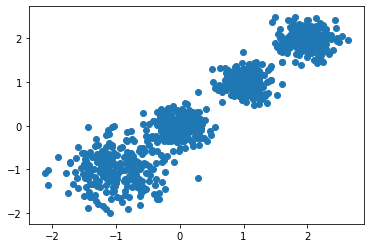

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# X为样本特征，Y为样本簇类别，共1000个样本，每个样本2个特征，对应x和y轴，共4个簇，
# 簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                  cluster_std=[0.4, 0.2, 0.2, 0.2], random_state=9)
                  
plt.scatter(X[:, 0], X[:, 1], marker='o')  # 假设暂不知道y类别，不设置c=y，使用kmeans聚类
plt.show()


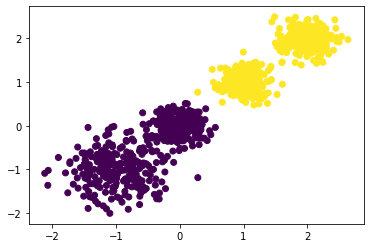

3116.1706763322227
[0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1
 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0
 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1
 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0
 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0
 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1
 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0
 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1
 0 0 1

In [10]:
from sklearn import metrics
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
print(metrics.calinski_harabasz_score(X, y_pred))
# 3116.1706763322227